<a href="https://colab.research.google.com/github/codecakes/ud_students_data_analysis/blob/master/ud_intro_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import datetime as dt
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config IPCompleter.greedy=True


In [0]:
import io

data = '''Admit,Gender,Dept,Freq
Admitted,Male,A,512
Rejected,Male,A,313
Admitted,Female,A,89
Rejected,Female,A,19
Admitted,Male,B,353
Rejected,Male,B,207
Admitted,Female,B,17
Rejected,Female,B,8
Admitted,Male,C,120
Rejected,Male,C,205
Admitted,Female,C,202
Rejected,Female,C,391
Admitted,Male,D,138
Rejected,Male,D,279
Admitted,Female,D,131
Rejected,Female,D,244
Admitted,Male,E,53
Rejected,Male,E,138
Admitted,Female,E,94
Rejected,Female,E,299
Admitted,Male,F,22
Rejected,Male,F,351
Admitted,Female,F,24
Rejected,Female,F,317'''

f = io.TextIOWrapper(io.StringIO(data))

In [36]:
df = pd.read_csv(f.buffer, usecols=('Admit','Gender','Dept','Freq'), skiprows=0)
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


In [37]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']
males.shape, females.shape

((12, 4), (12, 4))

In [0]:
grp = df.groupby(by=['Gender', 'Admit'])

In [39]:
grp.size()

Gender  Admit   
Female  Admitted    6
        Rejected    6
Male    Admitted    6
        Rejected    6
dtype: int64

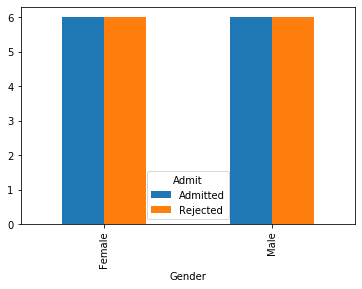

In [40]:
grp.size().unstack().plot.bar()

In [0]:
countries = [
             'Russian Fed.', 'Norway', 'Canada', 'United States',
             'Netherlands', 'Germany', 'Switzerland', 'Belarus',
             'Austria', 'France', 'Poland', 'China', 'Korea', 
             'Sweden', 'Czech Republic', 'Slovenia', 'Japan',
             'Finland', 'Great Britain', 'Ukraine', 'Slovakia',
            'Italy', 'Latvia', 'Australia', 'Croatia', 'Kazakhstan'
            ]

gold = [13, 11, 10, 9, 8, 8, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
silver = [11, 5, 10, 7, 7, 6, 3, 0, 8, 4, 1, 4, 3, 7, 4, 2, 4, 3, 1, 0, 0, 2, 2, 2, 1, 0]
bronze = [9, 10, 5, 12, 9, 5, 2, 1, 5, 7, 1, 2, 2, 6, 2, 4, 3, 1, 2, 1, 0, 6, 2, 1, 0, 1]
    
olympic_medal_counts = {'country_name':countries,
                        'gold': pd.Series(gold),
                        'silver': pd.Series(silver),
                        'bronze': pd.Series(bronze)}


In [0]:
df = pd.DataFrame(olympic_medal_counts, columns = olympic_medal_counts.keys())

In [0]:
n, _ = df.shape

In [44]:
cols = ['gold', 'silver', 'bronze']
medals = df[cols]
countries_with_medals = pd.concat(
    (df['country_name'], medals[medals.apply(lambda x: x>1)]), axis=1).dropna(
        how='all', subset=cols).fillna(value=0, axis=0)
countries_with_medals[cols].apply(lambda x: np.sum(x)/float(n))

gold      3.615385
silver    3.615385
bronze    3.576923
dtype: float64

In [45]:
countries_with_medals.head(2)

,country_name,gold,silver,bronze
0,Russian Fed.,13.0,11.0,9.0
1,Norway,11.0,5.0,10.0


In [0]:
medals = df.iloc[:, 1:]
n, ncols = medals.shape
points = np.arange(n, dtype=np.float).reshape(n, 1)


In [0]:
points_array = np.array([[4, 2, 1]], dtype=np.float).transpose()
np.matmul(medals, points_array, out=points, dtype=np.float, casting='unsafe')
olympic_points_df = pd.concat(
    (df['country_name'], pd.DataFrame(points, dtype=np.float)), axis=1)

# Predicting Titanic Survivors

In [0]:
import os
import functools

root_path = '/content'
open_fn = functools.partial(os.path.join, root_path)
gender_f = 'gender_submission.csv'
test_f = 'test.csv'
train_f = 'train.csv'

with open(open_fn(gender_f), 'rb') as f:
  titanic = pd.read_csv(f)

with open(open_fn(test_f), 'rb') as f:
  test = pd.read_csv(f)

with open(open_fn(train_f), 'rb') as f:
  train = pd.read_csv(f)





In [49]:
titanic.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [50]:
titanic.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [51]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [52]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [0]:
name_df = train['Name'].str.split(pat=',', n=2, expand=True)
name_df.columns=['First Name', 'Last Name']
train = train.merge(name_df, how='outer', left_index=True, right_index=True, copy=False)

In [54]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)


In [55]:
total, _ = train.shape
total

891

In [0]:
grp = train.groupby(by=['Sex', 'Survived'])

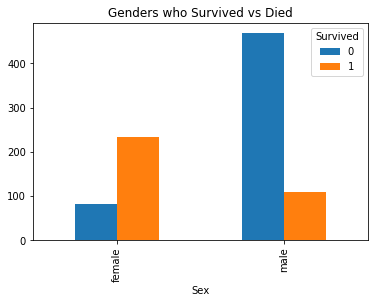

In [57]:
grp.size().unstack().plot.bar(title='Genders who Survived vs Died')

In [58]:
grp.size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [0]:
survived_stat = grp['Pclass'].count().unstack().agg(np.sum)

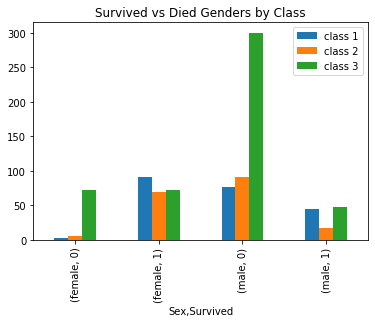

In [60]:
ax = grp['Pclass'].value_counts().unstack().plot.bar(title='Survived vs Died Genders by Class')
ax.legend(('class 1', 'class 2', 'class 3'))

In [61]:
grp['Pclass'].value_counts().unstack()

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

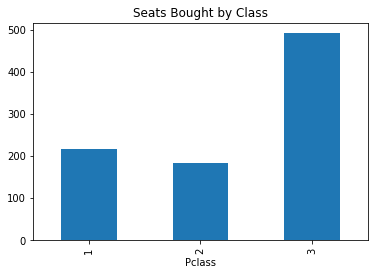

In [62]:
grp['Pclass'].value_counts().unstack().agg(np.sum).plot.bar(title='Seats Bought by Class')

In [63]:
tot_seats_by_class = grp['Pclass'].value_counts().unstack().agg(np.sum)
tot_seats_by_class

Pclass
1    216
2    184
3    491
dtype: int64

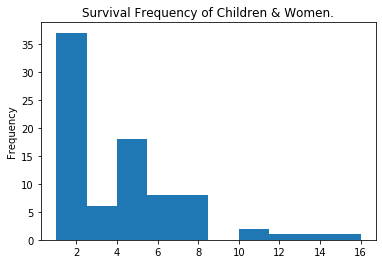

In [64]:
women_children = train[(train['Age'] < 18) | (train['Sex'] == 'female')]
women_children_grp = women_children.groupby(by=['Sex', 'Age'])
women_children_grp.size().plot.hist(title='Survival Frequency of Children & Women.')

In [65]:
women_children_grp.size().unstack().agg(np.sum, axis=1)

Sex
female    261.0
male       58.0
dtype: float64

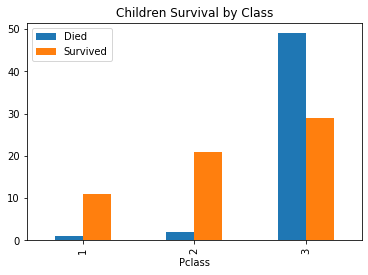

In [66]:
children = train[train['Age'] < 18]
children_survival_grp = children.groupby(by=['Pclass', 'Survived'])
ax = children_survival_grp.size().unstack().plot.bar(title='Children Survival by Class')
ax.legend(('Died', 'Survived'))

In [67]:
tot_kids_by_class = children_survival_grp.size().unstack().agg(np.sum, axis=1)
tot_kids_by_class

Pclass
1    12
2    23
3    78
dtype: int64

In [68]:
tot_kids_by_survival = children_survival_grp.size().unstack().agg(np.sum, axis=0)
tot_kids_by_survival

Survived
0    52
1    61
dtype: int64

In [69]:
children_survival_grp.size().unstack()

Survived,0,1
Pclass,,
1,1,11
2,2,21
3,49,29


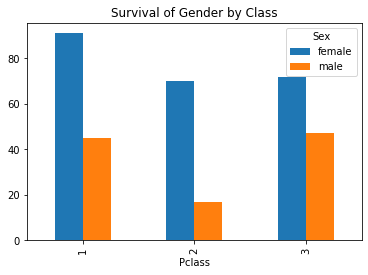

In [70]:
survival_grp = train[train['Survived'] == 1].groupby(by=['Pclass', 'Sex'])
survival_grp.size().unstack().plot.bar(title='Survival of Gender by Class')

In [71]:
survival_grp.size().unstack()

Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


In [72]:
survived_by_gender = survival_grp.size().unstack().agg(np.sum, axis=0)
survived_by_gender

Sex
female    233
male      109
dtype: int64

In [73]:
survived_by_class = survival_grp.size().unstack().agg(np.sum, axis=1)
survived_by_class

Pclass
1    136
2     87
3    119
dtype: int64

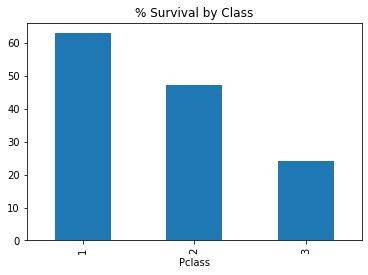

In [74]:
(survived_by_class/tot_seats_by_class * 100).plot.bar(title='% Survival by Class')

In [75]:
survived_by_class/tot_seats_by_class * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

In [76]:
genders_survived = [tot_kids_by_survival[1], survived_by_gender.male, survived_by_gender.female]
genders_survived

[61, 109, 233]

<BarContainer object of 3 artists>

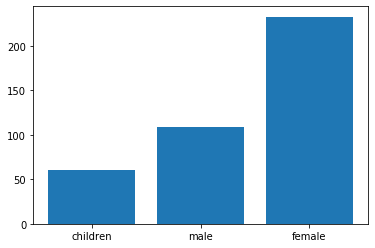

In [77]:
plt.bar(('children', 'male', 'female'), genders_survived, data=('children', 'male', 'female'), label='Survival by Gender')

### 

In [105]:
genders_survived = pd.DataFrame(genders_survived, dtype=np.int)
tot_gender = grp.size().unstack().agg(np.sum, axis=1)
tot_female, tot_male = tot_gender.female, tot_gender.male
tot_kids = tot_kids_by_survival.agg(np.sum)
survived = grp.size().unstack()[1]
survived_kids = tot_kids_by_survival[1]


survived_kids_per = round(survived_kids/float(tot_kids), 4) * 100
survived_female_per = round(survived.female/float(tot_female), 4) * 100
survived_male_per = round(survived.male/float(tot_male), 4) * 100
survival_data = (survived_kids_per, survived_female_per, survived_male_per)
print(('Survival ratio\nchildren: %.02f\nwomen: %.02f\nmen: %.02f') %(
    survival_data))

Survival ratio
children: 53.98
women: 74.20
men: 18.89


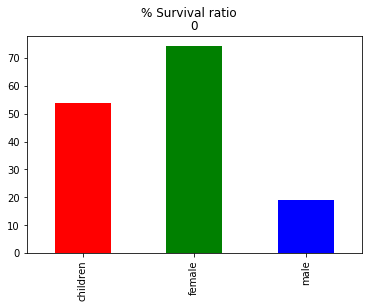

In [146]:
ax = pd.DataFrame(survival_data, dtype=np.float).plot.bar(
    title='% Survival ratio',
    color=('r', 'g', 'b'), subplots=True)
ax = ax[0]
ax.set_xticklabels(['children', 'female', 'male'])
ax.legend().set_visible(False)